- 数据分析（大概有10几万条数据）
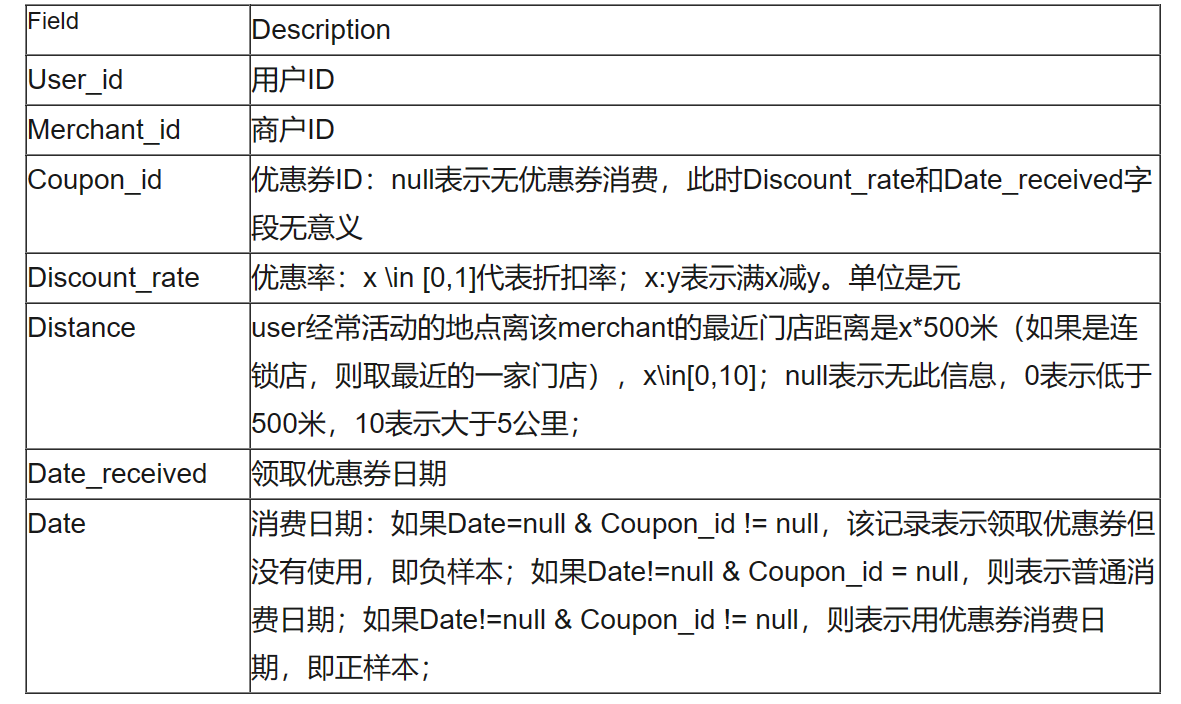

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns #绘图模块，基于matplotlib的可视化python包，不能完全替换matplotlib，只是对matplotlin进行升级
%matplotlib inline
plt.style.use('ggplot') #更改绘图风格，R语言绘图库的风格
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#### 1. 加载数据

In [5]:
offline=pd.read_csv(r"C:\Users\23665\Desktop\研一上课资料\111\sql\数据分析实战\ccf_offline_stage1_train\ccf_offline_stage1_train.csv",parse_dates=['Date_received','Date']) #parse_dates将指定的列转换为日期型，因为原来的是float64型
offline.info() #175+数据
#要看各个列是否需要转换成python能够操作的形式，Discount_rate  object需要转换而日期性本来就是float64的了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   User_id        int64         
 1   Merchant_id    int64         
 2   Coupon_id      float64       
 3   Discount_rate  object        
 4   Distance       float64       
 5   Date_received  datetime64[ns]
 6   Date           datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 93.7+ MB


In [6]:
offline.head(10)
#NaT时间日期格式的空值


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT


#### 2. 特征工程

In [3]:
#判断每一列当中有多少个空值
offline.isnull().sum() #sum表示计数，True的会计算进去，与count不同
#。isnull()函数之后会返回一个与原offline相相同的dateframe格式


# 优惠券id,折扣率，领券日期可能存在同时等于NaN的情况，但可能出现优惠卷不存在，领券日期存在的情况

NameError: name 'offline' is not defined

##### 2.1 将Discount_rate列中的满减政策转换成折扣率


In [11]:
offline['Discount_rate']=offline['Discount_rate'].fillna('null')
offline.head()  #替换是判断进行逻辑判断

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,null,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT


In [2]:
def discount_rate_opt(s):
    if ':' in s:
        split=s.split(':')
        discount_rate=(int(split[0])-int(split[1]))/int(split[0])
        return round(discount_rate,2)
    elif s=='null':
        return np.NaN
    else:
        return float(s)
        

In [17]:
def discount_rate_opt(s): #s表示每一个元素
    if ':' in s:
        split=s.split(':')
        discount_rate=(int(split[0])-int(split[1]))/int(split[0]) #(200-20)/20 计算折扣率
        return round(discount_rate,2)
    elif s=='null':
        return np.NaN
    else:
        return float(s) #看这一列也存在是折扣值

In [18]:
offline['Discount_rate']=offline['Discount_rate'].map(discount_rate_opt)
offline.head(50)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,0.95,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,0.90,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,0.90,1.0,2016-01-29,NaT
9,2029232,450,1532.0,0.83,0.0,2016-05-30,NaT


##### 2.2 Coupon_id:null代表没有优惠券，此时Discount_rate与Date_received字段无意义

检查Coupon_id与Discount_rate与Discount_received判断空值和非空值是否一一对应


In [19]:
#np.all():判断一个可迭代的数据中是否都是true,如果是返回TRUE,如果不是，返回false
print(np.all([True,True]))
print(np.all([True,False]))

True
False


In [24]:
nan1=offline['Coupon_id'].isnull() #判断优惠券是否为空
nan2=offline['Date_received'].isnull() #判断领券日期是否为空
np.all(nan1==nan2) #如果结果是True，说明这Coupon_id与Date_received空值与非空值之间是一一对应的

True

In [25]:
nan3=offline['Discount_rate'].isnull()
np.all(nan1==nan3)  #如果结果是True，说明这Coupon_id与Discount_rate空值与非空值之间是一一对应的

True

### 2.3 在消费时间
- 有券消费(cpon_cunsume)：Date!=null and COupon_id!=null
- 无券消费但是消费了（no_cpon_consume）:Date!=null and COupon_id=null
- 有券没有消费(cpon_no_consume):Date=null and COupon_id!=null
- 没有券也没有消费(no_cpon_no_cunsume):Date=null and COupon_id=null

In [30]:
cpon_no_consume=offline[(offline['Date'].isnull() & offline['Coupon_id'].notnull())]
no_cpon_no_cunsume=offline[(offline['Date'].isnull() & offline['Coupon_id'].isnull())]
no_cpon_consume=offline[(offline['Date'].notnull() & offline['Coupon_id'].isnull())]
cpon_cunsume=offline[(offline['Date'].notnull() & offline['Coupon_id'].notnull())]
cpon_no_consume
                        

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT
7,1832624,3381,7610.0,0.90,0.0,2016-04-29,NaT
...,...,...,...,...,...,...,...
1754866,3795296,5341,111.0,0.83,0.0,2016-01-29,NaT
1754869,188086,6568,4723.0,0.97,0.0,2016-04-15,NaT
1754876,212662,3532,5267.0,0.83,1.0,2016-03-22,NaT
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT


In [31]:
print('有券没消费：{}'.format(len(cpon_no_consume)))
print('无券没消费：{}'.format(len(no_cpon_no_cunsume))) #数量为0无意义不分析
print('无券消费：{}'.format(len(no_cpon_consume)))
print('有券消费：{}'.format(len(cpon_cunsume)))
#用优惠券进行消费的用户7万人，相比其他用户来说占比比较少

#### 3. 数据分析

In [38]:
# 绘制饼图占比
consume_status_dict={'cpon_no_consume':len(cpon_no_consume),'no_cpon_consume':len(no_cpon_consume),'cpon_cunsume':len(cpon_cunsume)}
consume_status=pd.Series(consume_status_dict)
consume_status

cpon_no_consume    977900
no_cpon_consume    701602
cpon_cunsume        75382
dtype: int64

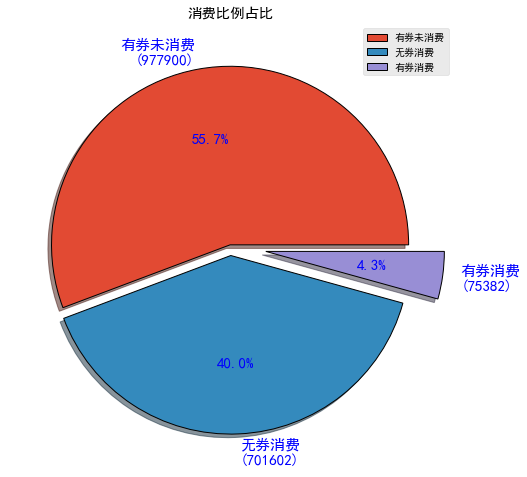

In [45]:
#消费方式构成的饼图（figure:看作一张画布，axes:代表画布内的多个坐标系）
fig,ax=plt.subplots(1,1,figsize=(8,10))
consume_status.plot.pie(
    ax=ax,
    autopct='%1.1f%%',
    shadow=True,
    explode=[0.01,0.05,0.2],
    textprops={'fontsize':15,'color':'blue'},
    wedgeprops={'linewidth':1,'edgecolor':'black'},
    
    labels=['有券未消费\n({})'.format(len(cpon_no_consume)),
           '无券消费\n({})'.format(len(no_cpon_consume)),
           '有券消费\n({})'.format(len(cpon_cunsume))]
)
ax.set_ylabel('') #去除ylabel
ax.set_title('消费比例占比')
plt.legend(labels=['有券未消费','无券消费','有券消费'])
#有券未消费占比最大，说明绝大多数人拿到券之后尚未i使用
#无券消费用户占比40%，说明很多人美誉使用优惠券，可能优惠券的吸引力不大，客户没注意；可能，新用户比较多，第一次来的用户没有优惠券
#用券消费用户占比较小4.3……，说明优惠券的使用率不高，可以考虑加大力度

##### 3.1 在有券消费人群中，分析距离和优惠折扣


In [52]:
#各商家对应顾客到店的平均距离
Merchant_distance=cpon_cunsume.groupby('Merchant_id')['Distance'].mean()
Merchant_distance.sort_values(ascending=False)
Merchant_distance
Merchant_distance[Merchant_distance==0]
#可知，4076各商家有1431个商家的用券消费用户平均范围在500米以内

Merchant_id
3       0.0
4       0.0
13      0.0
14      0.0
18      0.0
       ... 
8806    0.0
8824    0.0
8828    0.0
8849    0.0
8856    0.0
Name: Distance, Length: 1431, dtype: float64

<Axes: >

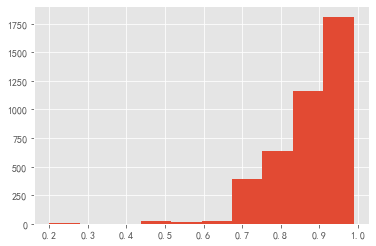

In [55]:
#各个商家对应的顾客到店消费平均折扣力度
Merchant_distance_rate=cpon_cunsume.groupby('Merchant_id')['Discount_rate'].mean()
Merchant_distance_rate.sort_values()
Merchant_distance_rate.hist()
Merchant_distance_rate.mean() #所有商家平均折扣的平均值0.88


##### 3.2 持券到店消费人数最多的商家

In [9]:
import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age']) # 将第一维度数据转为为行，第二维度数据转化为列，即 3 行 2 列，并设置列标签
#print(df)
df[df['Age']>10]
df1=df['Age']
df1
df1.name='name2'
df1

0    10
1    12
2    13
Name: name2, dtype: int64

In [63]:
# 对商家进行分组，取出用户id，对用户id进行去重统计数量
popular_merchant=cpon_cunsume.groupby('Merchant_id')['User_id'].apply(lambda x:len(x.unique())).sort_values(ascending=False)
#将持券消费人数大于500的人数过滤出来
popular_merchant500=popular_merchant[popular_merchant>500]
popular_merchant500.name='customer_count' #指定列名为消费者数量，持券消费者数量
len(popular_merchant500)
#共有16家电批，持券消费人数在500人以上

#持券消费人数最多的商家是5341，持券消费人数在2800
#排名最后的商家，持券消费人数为559人
#这批商家优惠券的使用方法得到，消费着喜欢用优惠券消费，可以适当借鉴这批商家的推广力度

16

##### 3.3 持券消费人数在500人以上的商家，连接顾客到店平均距离和平均折扣力度

In [65]:
merchant_pop_dis=pd.merge(left=popular_merchant500,right=Merchant_distance,on='Merchant_id',how='inner')
merchant_pop_dis_rate=pd.merge(left=merchant_pop_dis,right=Merchant_distance_rate,on='Merchant_id',how='inner')
merchant_pop_dis_rate

,customer_count,Distance,Discount_rate
Merchant_id,,,
5341,2800,0.168598,0.826036
760,2627,0.349866,0.799873
3381,2248,1.652429,0.744150
6485,2029,0.368567,0.770439
2099,1401,0.968072,0.900000
2934,1310,1.114833,0.830000
450,1094,0.892164,0.819274
3532,968,0.272498,0.852289
7555,925,1.329977,0.828381


##### 3.4 计算到店消费人数与平均距离和折扣力度的相关系数

In [66]:
#correct（correlation:相关系数）：用来计算df数据中列于列的相关性（皮尔逊相关系数），取值范围在【-1，1】之间
#1：完全正相关，-1：完全负相关
# 绝对值越大，相关性越大，反之成立
#正相关
#负相关
merchant_pop_dis_rate.corr() #得出彼此之间的相关系数
#持券消费人数与距离和折扣率都呈现负相关，属于生活中的正常现象

,customer_count,Distance,Discount_rate
customer_count,1.000000,-0.306180,-0.204102
Distance,-0.306180,1.000000,-0.397376
Discount_rate,-0.204102,-0.397376,1.000000


<Axes: >

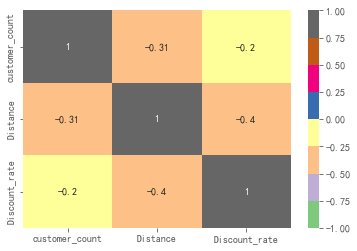

In [77]:
#用热力图展示相关系数,annot: 显示相关系数的值，vmax:最大值，vmin:最小值
sns.heatmap(data=merchant_pop_dis_rate.corr(),annot=True,cmap='Accent',vmax=1,vmin=-1) #cmap的取值去网上搜
#vmax=1,vmin=-1设置最大值和最小值

- 有图可以知道：
1. 到店消费人数的多少与顾客到店铺的距离之间呈现负相关，相关系数0.31，在0.3-0.5之间，为低度相关
2. 到店消费人数的多少与优惠打折力度呈现负相关，相关系数为0.2，在0-0.3之间，相关程度非常弱
- 综上所述，这些店家之所以火爆应该是物美价廉导致，与距离与相关系数联系不大

##### 4.1分析每当中优惠券的总体发放量与使用量情况


In [ ]:
业务分析：日期(优惠券的发放日期，使用日期date)用图表的x轴-->
需要统计每天优惠卷发放数量和使用数量

In [79]:
offline['Date'].notnull().sum() #77.7万消费数据

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,0.87,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,0.95,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,0.95,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,0.95,0.0,2016-06-13,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaT,2016-03-22
1754880,212662,3021,3739.0,0.97,6.0,2016-05-08,2016-06-02
1754881,212662,2934,NaN,NaN,2.0,NaT,2016-03-21
1754882,752472,7113,1633.0,0.80,6.0,2016-06-13,NaT


In [80]:
offline['Date_received'].notnull().sum() #已经发送出105万优惠券


1053282

In [82]:
#取出存在消费日期的记录进行升序在去重
date_sort=offline[offline['Date'].notnull()]['Date'].sort_values().unique()
#列表性数据
date_sort[:5]

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [84]:
#取出存在领券日期的记录，进行升序在去重
date_receive_sort=offline[offline['Date_received'].notnull()]['Date_received'].sort_values().unique()
#列表性数据
date_receive_sort[:5]

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [88]:
#每天优惠券的使用量（即持券消费人群）
consume_num_everyday=cpon_cunsume[['User_id','Date_received']]
consume_num_everyday=consume_num_everyday.groupby('Date_received').count()
consume_num_everyday=consume_num_everyday.rename(columns={'User_id':'count'})
consume_num_everyday

,count
Date_received,
2016-01-01,74
2016-01-02,67
2016-01-03,74
2016-01-04,98
2016-01-05,107
...,...
2016-06-11,351
2016-06-12,330
2016-06-13,439


In [101]:
#每天发放的优惠券数量(去除所有领券日期不等于NaN的数据，在进行按天分组，计数就可以)
coupon_sendout_everyday=offline[offline['Date_received'].notnull()][['Date_received','User_id']]
coupon_sendout_everyday=coupon_sendout_everyday.groupby('Date_received').count()
coupon_sendout_everyday=coupon_sendout_everyday.rename(columns={'User_id':'count'})
coupon_sendout_everyday

,count
Date_received,
2016-01-01,554
2016-01-02,542
2016-01-03,536
2016-01-04,577
2016-01-05,691
...,...
2016-06-11,5211
2016-06-12,4005
2016-06-13,7861


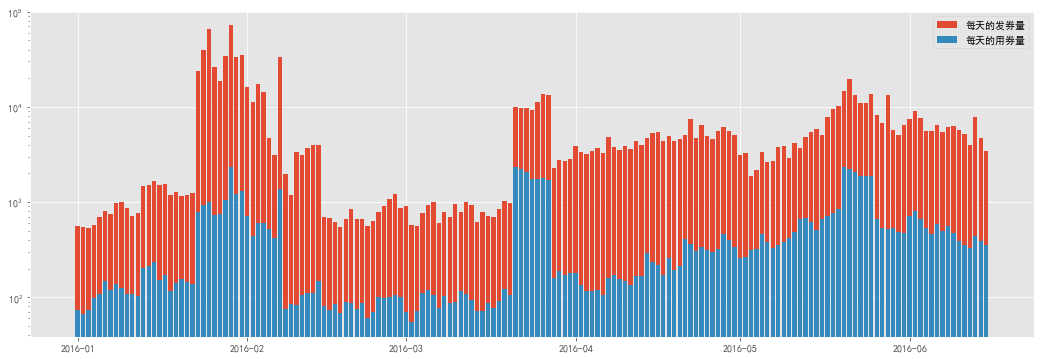

In [105]:
# 绘制每天的发券量和每天的用券量
plt.figure(figsize=(18,6))
plt.bar(x=date_receive_sort,height=coupon_sendout_everyday['count'],label='每天的发券量')
plt.bar(x=date_receive_sort,height=consume_num_everyday['count'],label='每天的用券量')
plt.legend()
#可以看到大值和小值之间的差距是非常大的，所以可以提取小的值进行分析
plt.yscale('log') #对y轴进行对数缩放
plt.legend()
#16年2月份为例，用券量级别为1000，发券量在10万左右，优惠券的使用率还是非常低的

<BarContainer object of 167 artists>

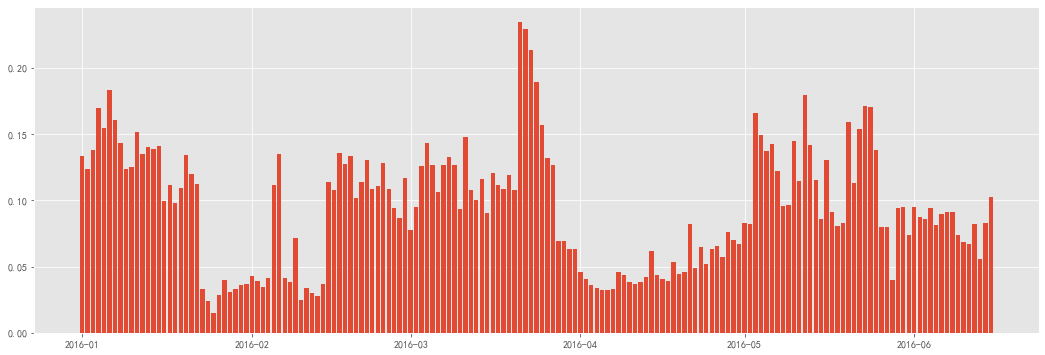

In [107]:
# 计算每天的优惠券与发券量占比
plt.figure(figsize=(18,6))
plt.bar(x=date_receive_sort,height=consume_num_everyday['count']/coupon_sendout_everyday['count'],
       label='百分比')

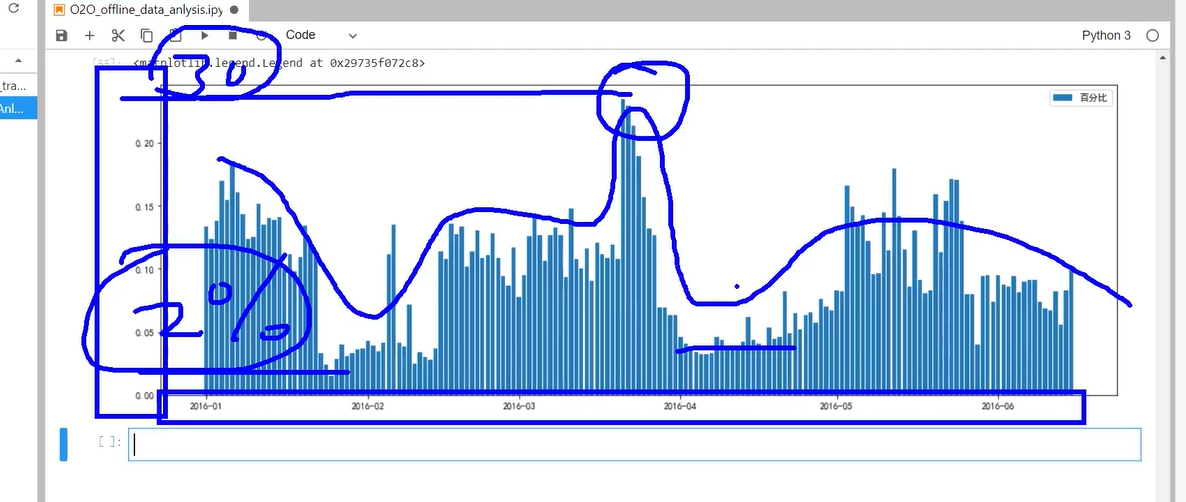
- 由图可知，优惠券的使用率最高在16年3月底，达到了30%
- 使用率最低在16年1月底，最低为3%左右
- 整体来看，优惠券使用率波动较大